In [ ]:
## 08/04/20- to 
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
dirwrite = '/home/dlobelle/Kooi_data/data_output/rho_920kgm-3/'

data = Dataset(dirwrite +'Kooi+NEMO_3D_grid10by10_rho920_r1e-04_100days_30dtsecs_5hrsoutdt.nc') 
t0 = data['time'][:]/86400
d0 = data['density'][:] #'tpp'

idx = [d0>0]
t = t0[idx]
d = d0[idx]

# plt.figure()
# plt.plot(test['lon'][:],test['lat'][:],'o')
#plt.plot(t,d)
#plt.gca().invert_yaxis()

In [ ]:
d0 = data['z'][:]

idx = [t0>=0.]
t = t0[idx]
d = d0[idx]

plt.plot(t,d)
plt.gca().invert_yaxis()

# print(d0)

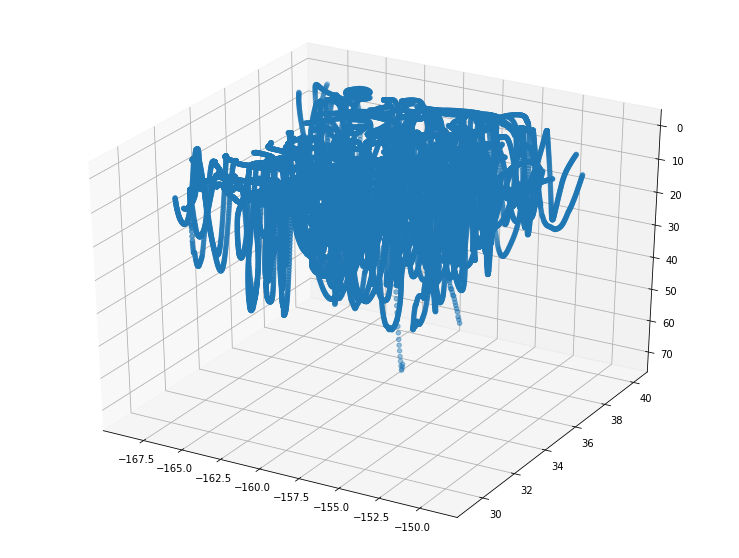

In [13]:
# 24/03/20- scatter plot for 3D lon, lat (no depth yet)

time = data['time'][:].squeeze()
lons = data['lon'][:].squeeze()
lats = data['lat'][:].squeeze()
depth = data['z'][:].squeeze()

fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')
ax.scatter(lons,lats,depth) #,c=time,cmap=plt.cm.jet)
ax.invert_zaxis()

# im = ax.imshow(data, cmap='bone')
# fig.colorbar(im, cax=cax, orientation='vertical')

# fig.colorbar()
#print(depth)

# t0 = data['time'][:].squeeze()
# lons = data['lon'][:]#.squeeze()
# lats = data['lat'][:]#.squeeze()
# depth = data['z'][:].squeeze()

# #fig = plt.figure(figsize=(13,10))
# #ax = plt.axes(projection='3d')
# plt.plot(lons,lats) #,c=depth) #,c=t0,cmap=plt.cm.jet)
# #ax.invert_zaxis()

Text(0.5, 1.0, '')

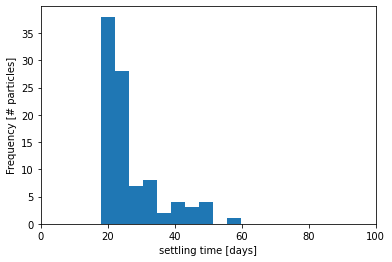

In [14]:
z_all = data['z']
#test = [np.array(z_all)>1.]
#len(z_all)

t1 = t0[1,:]

z_set = []
for i in range (len(z_all)):
    z0 = np.array(z_all[i,:])
    z1 = (np.where(z0 > 1.))
    z2 = z1[0]
    #print(z2)
    if not z2.any(): 
        continue
    else:
        z_set.append(z2[0])
        
t_set = t1[z_set]   

plt.hist(t_set)  
plt.xlabel('settling time [days]')
plt.ylabel('Frequency [# particles]')
plt.xlim(t1[0],t1[-1])
plt.title('')

#print(z_all.shape)

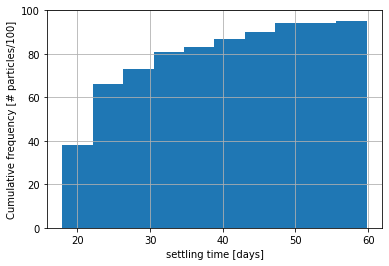

In [15]:
chist = pd.Series(t_set)
chist.hist(cumulative=True) #, density=1, bins=100)
plt.xlabel('settling time [days]')
plt.ylabel('Cumulative frequency [# particles/100]')
plt.ylim(0,100)
plt.show()

Text(0.5, 1.0, 'w of 0.1 m d-1')

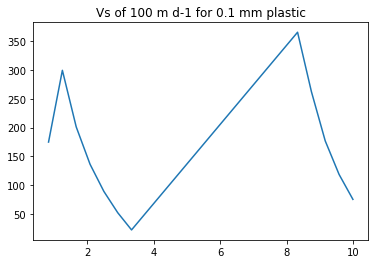

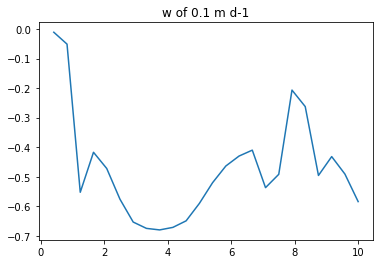

In [27]:
#To compare orders of magnitude of 'vs': plastic's settling velocity against 'w': seawater's vertical velocity (results: 'vs' is 3 orders of mag stronger than 'w' for 0.1 mm plastic with vs of 100 m d-1)
data = Dataset(dirwrite +'Kooi+NEMO_1DwithWadv_rho920_r1e-04_10days_10dtsecs_10hrsoutdt.nc')
#data = Dataset(dirwrite +'Kooi+NEMO_1D_latslons.nc')
t0 = data['time'][:]
d0 = data['vs'][:]

idx = [d0>0]
t = t0[idx]/86400
d = d0[idx]*86400

plt.figure()
plt.plot(t,d)
plt.title('Vs of 100 m d-1 for 0.1 mm plastic')

t0 = data['time'][:]
d0 = data['w'][:]

idx = [d0<0]
t = t0[idx]/86400
d = d0[idx]*86400

plt.figure()
plt.plot(t,d)
plt.title('w of 0.1 m d-1')


In [4]:
# import xarray as xr
# import warnings
# warnings.filterwarnings("ignore")

# nemo_z = np.array([0, 1.023907, 2.10319, 3.251309, 4.485053, 5.825238, 7.297443, 
#     8.932686, 10.7679, 12.84599, 15.21527, 17.92792, 21.03757, 24.59599, 
#     28.64965, 33.23697, 38.3871, 44.12101, 50.45447, 57.40257, 64.9846, 
#     73.2287, 82.17556, 91.88141, 102.4202, 113.8852, 126.3909, 140.074, 
#     155.095, 171.6402, 189.9228, 210.1845, 232.697, 257.7629, 285.7158, 
#     316.9199, 351.768, 390.6786, 434.0905, 482.4563, 536.2332, 595.8721, 
#     661.8052, 734.4321, 814.1057, 901.118, 995.6885, 1097.954, 1207.963, 
#     1325.672, 1450.95, 1583.582, 1723.28, 1869.693, 2022.425, 2181.044, 
#     2345.101, 2514.137, 2687.699, 2865.347, 3046.659, 3231.24, 3418.723, 
#     3608.769, 3801.072, 3995.354, 4191.367, 4388.89, 4587.726, 4787.702, 
#     4988.667, 5190.488, 5393.049, 5596.249, 5800])

# dirread_bgc = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA_BGC/ORCA0083-N006/means/'  
# ppfiles = (dirread_bgc+'ORCA0083-N06_20070105d05D.nc')
# pp_orig = xr.open_dataset(ppfiles)
# euph_z,nd_phy_ml = pp_orig.variables['MED_XZE'], pp_orig.variables['ML_PRN']

# n = nemo_z*0
# euph_z1 = euph_z[:,1500,30].data
# id_ = nemo_z < euph_z1
# test = [nd_phy_ml]*id_

# #test = nemo_z[id_]
# #test2 = test*0
# print(test)


In [ ]:
# import xarray as xr
# import warnings
# warnings.filterwarnings("ignore")

# dirread = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
# initialgrid_mask = dirread+'ORCA0083-N06_20070105d05U.nc'
# mask = xr.open_dataset(initialgrid_mask, decode_times=False)
# Lat, Lon = mask.variables['nav_lat'], mask.variables['nav_lon']